# Project: Capstone Project 1: Inferential Statistics


## Load Data and View It

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import random

In [2]:
filename = 'UCI_Credit_Card.csv'

In [3]:
data = pd.read_csv(filename, index_col=0)

In [4]:
pd.set_option('display.max_columns', 500)
data.sample(5).transpose()

ID,21856,5156,11550,17670,6444
LIMIT_BAL,180000.0,80000.0,80000.0,500000.0,110000.0
SEX,2.0,1.0,1.0,2.0,2.0
EDUCATION,2.0,2.0,1.0,2.0,2.0
MARRIAGE,2.0,2.0,2.0,1.0,2.0
AGE,27.0,27.0,39.0,44.0,32.0
PAY_0,0.0,-1.0,0.0,0.0,0.0
PAY_2,0.0,-1.0,0.0,0.0,0.0
PAY_3,0.0,-1.0,0.0,0.0,0.0
PAY_4,0.0,-1.0,0.0,0.0,0.0
PAY_5,0.0,2.0,0.0,0.0,0.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6                     30000 non-null float64
PAY_AMT1  

In [6]:
display(data.shape)

(30000, 24)

In [7]:
data.head().transpose()

ID,1,2,3,4,5
LIMIT_BAL,20000.0,120000.0,90000.0,50000.0,50000.0
SEX,2.0,2.0,2.0,2.0,1.0
EDUCATION,2.0,2.0,2.0,2.0,2.0
MARRIAGE,1.0,2.0,2.0,1.0,1.0
AGE,24.0,26.0,34.0,37.0,57.0
PAY_0,2.0,-1.0,0.0,0.0,-1.0
PAY_2,2.0,2.0,0.0,0.0,0.0
PAY_3,-1.0,0.0,0.0,0.0,-1.0
PAY_4,-1.0,0.0,0.0,0.0,0.0
PAY_5,-2.0,0.0,0.0,0.0,0.0


## Data Cleaning

In [8]:
## Rename columns
data.rename(columns={'PAY_0': 'PAY_1', 'default.payment.next.month': 'default'}, inplace=True)

In [9]:
# Set all negative values to 0 in the PAY_X columns
for i in range(1,7):
    data.loc[data["PAY_" + str(i)] < 0, "PAY_" + str(i)] = 0

In [10]:
# Set all 0 Marriage values to 3
data.loc[data["MARRIAGE"] == 0, 'MARRIAGE'] = 3

In [11]:
# Set values of 0, 5, and 6 to 4 for Education
replace = (data["EDUCATION"] == 0) | (data["EDUCATION"] == 5) | (data["EDUCATION"] == 6) 
data.loc[replace,'EDUCATION'] = 4

## Correlations

*Questions from Proposal*:  
The goal of this project is to effectively predict credit card payment default using demographic factors, credit data, repayment statuses, bill statements, and history of payments. 
Two sub-goals accompanying that goal are:
1. determining how the probability of default payment varies by categories of different demographic variables
2. determining the strongest predictors of default payment among the variables 

Think of the following questions and apply them to your dataset:
+ Are there variables that are particularly significant in terms of explaining the answer to your project question?
+ Are there strong correlations between pairs of independent variables or between an independent and a dependent variable?
+ What are the most appropriate tests to use to analyse these relationships?


Our goal for this project is to predict credit card default. Therefore, the most natural question to ask is, how do we predict credit card default? This leads to the question "Which factors are most important for predicting credit card default."

+ Are there variables that are particularly significant in terms of explaining the answer to your project question?

We will begin this analysis by repeating some code from the Data Storytelling Notebook about correlations. We will look at which variables have the highest correlations with default.

In [12]:
c = data.corr()
c['default'].sort_values()

LIMIT_BAL   -0.153520
PAY_AMT1    -0.072929
PAY_AMT2    -0.058579
PAY_AMT4    -0.056827
PAY_AMT3    -0.056250
PAY_AMT5    -0.055124
PAY_AMT6    -0.053183
SEX         -0.039961
MARRIAGE    -0.027575
BILL_AMT1   -0.019644
BILL_AMT2   -0.014193
BILL_AMT3   -0.014076
BILL_AMT4   -0.010156
BILL_AMT5   -0.006760
BILL_AMT6   -0.005372
AGE          0.013890
EDUCATION    0.033842
PAY_6        0.244437
PAY_5        0.260850
PAY_4        0.269055
PAY_3        0.286999
PAY_2        0.327093
PAY_1        0.396019
default      1.000000
Name: default, dtype: float64

So it seems like the variables that are particularly significant at explaining default are LIMIT_BAL (or the amount of given credit) and the PAY_X variables. In the case of LIMIT_BAL, there is a negative correlation, so having more credit seems to be a predictor for a reduced chance of default. In the case of the PAY_X or repayment status variables, the correlations are positive and all above 0.2. So being behind on your payments seems to be a good predictor of defaulting, logically enough. Not only that, being behind on your payments closer to the end of the payment period (September 2005, in our dataset) brings with it a greater association with default, than being behind at the beginning of the observed period (April 2005, in our case). This is also logical. At the end of the period, there is no time to get one's finances in order and avoid default. At the beginning there is lots of time for people behind to get their house in order. There is also time for people with good finances to develop bad finances that lead to default, thus weakening the correlation.

Test: Convert all repayment statuses greater than 1 to 1, and see how our correlations change

In [13]:
#data.loc[data.PAY_6>0, 'PAY_6'] = 1
#data.loc[data.PAY_5>0, 'PAY_5'] = 1
#data.loc[data.PAY_4>0, 'PAY_4'] = 1
#data.loc[data.PAY_3>0, 'PAY_3'] = 1
#data.loc[data.PAY_2>0, 'PAY_2'] = 1
#data.loc[data.PAY_1>0, 'PAY_1'] = 1


In [14]:
#data.loc[data.PAY_1>0][['PAY_1', 'default']]

Result: Doesn't change the correlations that much.

In [15]:
#data.loc[(data.PAY_6==1) | (data.PAY_5==1) | (data.PAY_4==1) | (data.PAY_3==1) | (data.PAY_2==1) | (data.PAY_1==1)][['PAY_6','PAY_5','PAY_4','PAY_3','PAY_2','PAY_1', 'default']]

+ Are there strong correlations between pairs of independent variables or between an independent and a dependent variable?

We have already looked at the correlations between the dependent variable, default, and the independent ones. Now we will re-examine the correlations between independent variables from our Data Storytelling EDA.

In [16]:
pd.set_option('display.max_rows', 500)
c = data.corr().unstack().sort_values()
c[:-24][::2]

AGE        MARRIAGE    -0.412001
LIMIT_BAL  EDUCATION   -0.231088
PAY_2      LIMIT_BAL   -0.197136
PAY_3      LIMIT_BAL   -0.191323
PAY_4      LIMIT_BAL   -0.180629
PAY_1      LIMIT_BAL   -0.170745
PAY_5      LIMIT_BAL   -0.170045
PAY_6      LIMIT_BAL   -0.167820
default    LIMIT_BAL   -0.153520
EDUCATION  MARRIAGE    -0.136797
LIMIT_BAL  MARRIAGE    -0.111012
PAY_AMT1   PAY_2       -0.097475
SEX        AGE         -0.090874
PAY_1      PAY_AMT1    -0.079177
PAY_AMT3   PAY_4       -0.074064
PAY_3      PAY_AMT2    -0.073670
PAY_AMT1   default     -0.072929
PAY_AMT5   PAY_6       -0.066875
PAY_AMT4   PAY_5       -0.065943
PAY_AMT3   PAY_1       -0.062620
PAY_1      PAY_AMT4    -0.061886
PAY_AMT3   PAY_2       -0.059865
PAY_AMT2   default     -0.058579
PAY_AMT3   PAY_3       -0.057702
PAY_1      PAY_AMT2    -0.057189
PAY_AMT4   default     -0.056827
PAY_AMT3   default     -0.056250
PAY_4      PAY_AMT4    -0.055305
default    PAY_AMT5    -0.055124
PAY_2      PAY_AMT2    -0.054838
PAY_4     

We have already examined these correlations in our Data Storytelling Notebook. To recap the most noteable correlations (greater than an absolute value of 0.1):
+ Age and Marriage are negatively correlated. In the context of our dataset where a value of 1 for Marriage indicates marriage, it means that age and marriage are correlated, as we would assume.
+ LIMIT_BAL and Education are negatively correlated. In the context our dataset where lower values for education indicate more education, it means that more credit is given to individuals with more education, as we would assume.
+ LIMIT_BAL and the repayment status variables (PAY_X) are negatively correlated. This means that individuals with more credit have better repayment records. This was a finding from our EDA and explains why they are able to take on so much credit.
+ Education and Marriage are negatively correlated. Since lower values for Education mean more education and a value of 1 for Marriage indicates marriage, this negative correlation holds. A working hypothesis for this is that individuals pursuing more education need to push off marriage.
+ LIMIT_BAL and Marriage are negatively correlated. This means that married individuals take on more credit than single individuals. This makes sense since married individuals tend to have more expenses than single individuals.
+ The bill statement variables (BILL_AMTX), previous payment variables (PAY_AMTX), and repayment status variables (PAY_X) are correlated with each other and themselves. This makes sense: they are all in one sense measuring the same thing. Greater spending one month should be related to greater spending the next or previous month; it should also be related to the amount paid back, and whether or not you are behind on payments.
+ Age and LIMIT_BAL are positively correlated. This means that older individuals have more credit taken on. This makes sense since they have had more time to take on credit.
+ Education and Age are correlated, meaning that they are negatively correlated because greater values for education indicate less education. A possible hypothesis is that credit lendors are willing to lend to individuals with more education at a younger age because they have greater confidence in their ability to repay due to their higher education.
+ LIMIT_BAL is correlated with repayment totals and bill amounts. This is intuitive: taking on more credit should be associated with greater amounts spent and greater amounts paying back that credit.

It is important to remember that correlation only measures the strength of linear relationships. So time should be taken to examine scatterplots of the data to see if other relationships exist.

+ What are the most appropriate tests to use to analyse these relationships?

There are a few notable insights that we gleaned from our data by doing EDA:
1. The correlation between default and final repayment status is about 0.4.
1. Men default at a higher rate than women
2. People with only a high school education have higher rates of marriage than people with graduate school education
3. The mean age of people with only a high school education (about 40.3) is considerably higher than people with a graduate school education (about 34.2)
4. Married individuals are more likely to default than singles (23.5% vs. 20.9%)


To evaluate these claims, we need to employ a few hypothesis testing methods:
1. Two-sample bootstrap hypothesis tests for difference of means (Claims 2 - 5)
2. Permutation Tests for difference of distributions (Claims 2 - 5)
3. Hypothesis tests on Pearson correlation coefficient (Claim 1)

**Claim 1: We will first test the null hypothesis that the correlation between default and the final repayment status (PAY_1) is 0.** 

In [17]:
def pearson_r(x, y):
    """Compute pearson correlation coefficient between 2 arrays"""
    
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)
    
    # Return entry [0,1]
    return corr_mat[0,1]

In [18]:
default = data['default'].copy()
PAY_1 = data['PAY_1'].copy()


In [19]:
# Compute observed correlation: r_obs
r_obs = pearson_r(data['default'], PAY_1)
r_obs

0.39601917075797216

In [20]:
# Initialize permutation replicates: perm_replicates
np.random.seed(42)
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute 'Excess Readmission Ratio': ratio_permuted
    default_permuted = np.random.permutation(default)
    
    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(data['PAY_1'], default_permuted)

# Compute p-value: p
p = np.sum(perm_replicates >= abs(r_obs)) / len(perm_replicates)
print('p-val = ', p )

p-val =  0.0


So we get a p-value of 0 for the hypothesis that the correlation between default and PAY_1 is actually 0. So we can safely reject it.

(array([   9.,  115.,  537., 1672., 2706., 2817., 1517.,  493.,  122.,
          12.]),
 array([-2.15937672e-02, -1.72645307e-02, -1.29352941e-02, -8.60605761e-03,
        -4.27682109e-03,  5.24154393e-05,  4.38165196e-03,  8.71088849e-03,
         1.30401250e-02,  1.73693615e-02,  2.16985981e-02]),
 <a list of 10 Patch objects>)

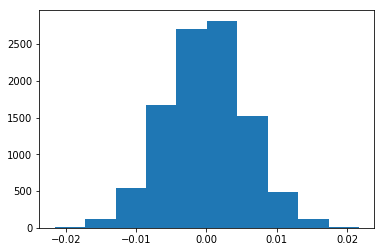

In [21]:
plt.hist(perm_replicates)

**Claim 2: Men default at a higher rate than women**

To test this claim, we can use either a 2-sample bootstrap test for difference of means, or a permutation test for difference of distributions.

Let's start with the 2-sample bootstrap test for difference of means.

In [22]:
sex_and_default = data[['SEX', 'default']]

In [23]:
men_default = sex_and_default.loc[data.SEX == 1,:]['default']
women_default = sex_and_default.loc[data.SEX == 2,:]['default']

In [24]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates"""
    
    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)
    
    #Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
    
    return bs_replicates

def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

In [25]:
def bootstrap_2s(group1, group2, group_all):
    mean_all = np.mean(group_all)
    print('mean_all = ', mean_all)
    
    real_diff = np.mean(group1) - np.mean(group2)
    print('real_diff = ', real_diff)
    
    # Generate Shifted Arrays
    group1_shifted = group1 - np.mean(group1) + mean_all
    print('group1_shifted = ', np.mean(group1_shifted))
    group2_shifted = group2 - np.mean(group2) + mean_all
    print('group2_shifted = ', np.mean(group2_shifted))
    
    # Compute 10,000 bootstrap replicates from shifted arrays
    bs_replicates_group1 = draw_bs_reps(group1_shifted, np.mean, 10000)
    bs_replicates_group2 = draw_bs_reps(group2_shifted, np.mean, 10000)
    
    # Get replicates of difference of means: bs_replicates
    bs_replicates = bs_replicates_group1 - bs_replicates_group2
    
    # Compute and print p-value: p
    p = np.sum(bs_replicates >= (real_diff)) / 10000
    print('p-value = ', p)
    
    plt.hist(bs_replicates)

mean_all =  0.2212
real_diff =  0.033909465375304954
group1_shifted =  0.22120000000004167
group2_shifted =  0.22119999999990222
p-value =  0.0


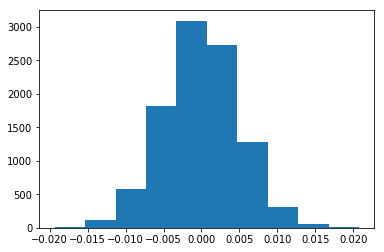

In [26]:
men_default = sex_and_default.loc[data.SEX == 1,:]['default']
women_default = sex_and_default.loc[data.SEX == 2,:]['default']
all_default = sex_and_default['default']
bootstrap_2s(men_default, women_default, all_default)

So we see that the difference in default rates between men and women is significant such that when we standardized the means to be the same and ran 10,000 simulations, none of the simulations produced a difference in defaults as large as what we actually observed. So we may reject the Null Hypothesis that men and women default at the same rate.

Although we already know the answer for this, let us test the hypothesis that the distributions are the same.

In [27]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""
    
    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))
    
    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)
    
    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]
    
    return perm_sample_1, perm_sample_2

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""
    
    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)
    
    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)
        
        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)
        
    return perm_replicates

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays"""
    diff = np.mean(data_1) - np.mean(data_2)
    
    return diff

In [28]:
# Compute difference of mean defaults: empirical_diff_defaults
empirical_diff_defaults = diff_of_means(men_default, women_default)

In [29]:
# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(men_default, women_default, diff_of_means, size=10000)

In [30]:
# Compute the p-value: p
p = np.sum(perm_replicates >= empirical_diff_defaults) / len(perm_replicates)

# Print the result
print('p-value = ', p)

p-value =  0.0


(array([  15.,  101.,  557., 1714., 2798., 2750., 1474.,  490.,   89.,
          12.]),
 array([-0.01820012, -0.01450787, -0.01081561, -0.00712335, -0.0034311 ,
         0.00026116,  0.00395342,  0.00764568,  0.01133793,  0.01503019,
         0.01872245]),
 <a list of 10 Patch objects>)

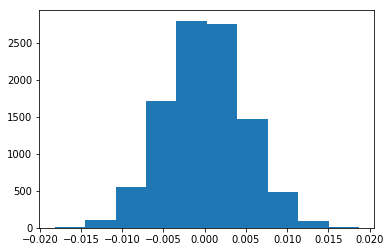

In [31]:
plt.hist(perm_replicates)

As we can see again, the difference in default rates is never as great as what we observed. So we can reject the Null Hypothesis that men's and women's rates of default come from the same distribution.

**Claim 3: People with only a high school education have higher rates of marriage than people with graduate school education**

This can be seen in the following table:

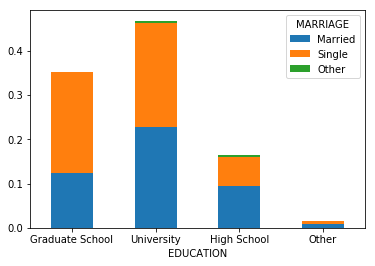

In [32]:
EM = data.groupby(['EDUCATION', 'MARRIAGE']).size().unstack(['MARRIAGE'])
EM.rename(index = {1:"Graduate School", 2:"University", 3:"High School", 4:"Other"},columns={1:"Married", 2:"Single", 3:"Other"}, inplace=True)
EM = EM/len(data)
EM.plot(kind='bar', stacked=True)
plt.xticks(rotation='horizontal')
plt.show()

The exact values are found in the first column of the following table:

In [33]:
EM = data.groupby(['EDUCATION', 'MARRIAGE']).size().unstack(['MARRIAGE'])
EM['total'] = EM[1] + EM[2] + EM[3] 
EM = EM.loc[:, [1,2,3]].div(EM["total"], axis=0)
EM['Total'] = EM[1] + EM[2] + EM[3] 
EM.rename(columns={1:"Married", 2:"Single", 3:"Other"}, inplace=True)
EM.rename(index = {1:"Graduate School", 2:"University", 3:"High School", 4:"Other"}, inplace=True)
#gender['Percentage Default'] = pd.Series(["{0:.1f}%".format(val * 100) for val in gender['Percentage Default']], index=gender.index)
EM = (EM * 100).round(1)
for column in EM.columns:
    EM[column] = pd.Series(["{0:.1f}%".format(val) for val in EM[column]], index=EM.index)
EM

MARRIAGE,Married,Single,Other,Total
EDUCATION,,,,
Graduate School,35.2%,64.3%,0.5%,100.0%
University,48.8%,50.0%,1.2%,100.0%
High School,58.2%,38.8%,3.0%,100.0%
Other,50.0%,48.3%,1.7%,100.0%


So we see that graduates of graduate school have about a 35% rate of marriage, whereas high-school only graduates have a marriage rate of about 58%. 

To test the Null hypothesis that these rates might actually be the same, we must do a 2-sample bootstrap hypothesis test.

In [34]:
education_and_marriage = data[['EDUCATION', 'MARRIAGE']].loc[(data.EDUCATION == 1) | (data.EDUCATION == 3), :]
#education_and_marriage for grad and high school people

In [35]:
education_and_marriage = education_and_marriage.loc[education_and_marriage.MARRIAGE != 3] 
# Exclude values that are not married or single
education_and_marriage.loc[education_and_marriage["MARRIAGE"] == 2, 'MARRIAGE'] = 0
# Convert single values to 0 to fit our bootstrap function


In [36]:
grad_marriage = education_and_marriage.loc[education_and_marriage.EDUCATION == 1, 'MARRIAGE']
np.mean(grad_marriage)
#mean_grad_marriage = 2 - np.mean(education_and_marriage.loc[education_and_marriage.EDUCATION == 1, 'MARRIAGE'])

0.35343272243851487

In [37]:
high_marriage = education_and_marriage.loc[education_and_marriage.EDUCATION == 3, 'MARRIAGE']
np.mean(high_marriage)
#mean_high_marriage = 2 - np.mean(education_and_marriage.loc[education_and_marriage.EDUCATION == 3, 'MARRIAGE'])

0.59979035639413

In [38]:
education_and_marriage = education_and_marriage.loc[:, 'MARRIAGE']

mean_all =  0.4302333180837854
real_diff =  0.24635763395561516
group1_shifted =  0.4302333180837723
group2_shifted =  0.4302333180837209
p-value =  0.0


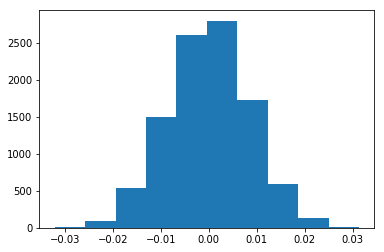

In [39]:
bootstrap_2s(high_marriage, grad_marriage, education_and_marriage)

So it is certainly the case that people with graduate degrees have a different (and smaller) rate of marriage than those with just a high-school diploma, in our sample.

**Claim 4: The mean age of people with only a high school education (about 40.3) is considerably higher than people with a graduate school education (about 34.2)**

In [40]:
var = data[['EDUCATION', 'AGE']].groupby('EDUCATION').agg({'mean', 'std'})
var.round(1)

AGE      
            std  mean
EDUCATION            
1           8.3  34.2
2           8.9  34.7
3          10.4  40.3
4           9.3  36.1

We can see from the above chart that the mean age of people with only a high school education is greater than that of graduate students. Let's run through our normal 2 sample bootstrap hypothesis test.

In [41]:
education_and_age = data[['EDUCATION', 'AGE']].loc[(data.EDUCATION == 1) | (data.EDUCATION == 3), :]

grad_age = education_and_age.loc[education_and_age.EDUCATION == 1, 'AGE']
np.mean(grad_age)


34.23183750590458

In [42]:
high_age = education_and_age.loc[education_and_age.EDUCATION == 3, 'AGE']
np.mean(high_age)


40.29997966239577

In [43]:
education_and_age = education_and_age.loc[:, 'AGE']
np.mean(education_and_age)

36.1565604438137

mean_all =  36.1565604438137
real_diff =  6.0681421564911915
group1_shifted =  36.15656044381571
group2_shifted =  36.15656044381484
p-value =  0.0


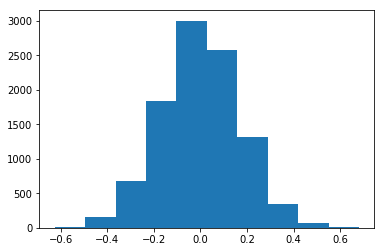

In [44]:
bootstrap_2s(high_age, grad_age, education_and_age)

So we again see that the means of the ages are different for these 2 groups within our sample. 

**Claim 5: Married individuals are more likely to default than singles (23.5% vs. 20.9%)**

In [45]:
def relationship_with_default(column):
    res = data.groupby([column, 'default']).size().unstack()
    res.rename(columns={0:"No Default", 1:"Default"}, inplace=True)
    res['percentage default'] = (res[res.columns[1]]/(res[res.columns[0]] + res[res.columns[1]]))
    res['percentage default'] = pd.Series(["{0:.1f}%".format(val * 100) for val in res['percentage default']], index=res.index)
    return res

In [46]:
table = relationship_with_default('MARRIAGE')
table.rename(index={1:"Married", 2:"Single", 3:"Other"}, inplace=True)
table

default,No Default,Default,percentage default
MARRIAGE,,,
Married,10453,3206,23.5%
Single,12623,3341,20.9%
Other,288,89,23.6%


We will again run through a bootstrap test to determine if the mean rate of default for marrieds and singles is different.

In [47]:
marriage_and_default = data[['MARRIAGE', 'default']].loc[(data.MARRIAGE == 1) | (data.MARRIAGE == 2), :]

marriage_default = marriage_and_default.loc[marriage_and_default.MARRIAGE == 1, 'default']
np.mean(marriage_default)


0.23471703638626545

In [48]:
singles_default = marriage_and_default.loc[marriage_and_default.MARRIAGE == 2, 'default']
np.mean(singles_default)

0.20928338762214985

In [49]:
marriage_and_default = marriage_and_default.loc[:,'default']
np.mean(marriage_and_default)

0.22101070114438107

mean_all =  0.22101070114438107
real_diff =  0.025433648764115607
group1_shifted =  0.22101070114440344
group2_shifted =  0.2210107011444654
p-value =  0.0


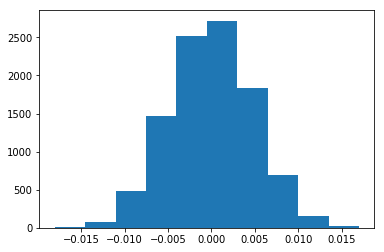

In [50]:
bootstrap_2s(marriage_default, singles_default, marriage_and_default)

We see that marrieds and singles really have different default rates, that is, we can reject the Null Hypothesis that their rates of default are equal.